# Hotel Reservations Dataset
Can you predict if customer is going to cancel the reservation ?
## About Dataset
### Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.
#### Can you predict if the customer is going to honor the reservation or cancel it ?
##### About the file 
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.
###### Data Dictionaly 
* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

# Lets import the required modules

In [1]:
import pandas as pd # Data Processing 
import numpy as np # Array Processing
import seaborn as sns # Headtmapping 
import matplotlib.pyplot as plt # Graph Plotting
from sklearn.preprocessing import FunctionTransformer # Transforming of Data 
from sklearn.preprocessing import OneHotEncoder # Encodfing of Catetgorical Data
from sklearn.preprocessing import StandardScaler # Scaling of Data 
from imblearn.over_sampling import RandomOverSampler # Sampling of Data 
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors Classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.metrics import classification_report # Classification Report
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


Lets get our data into working 

In [2]:
 data = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")

It is a good practice to take a look at our dataset before processing it

In [3]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

So the data set has `36275 rows` and `19 columns` accounting to `689,225 values`. This huge number of data will really help us in making a good model. Also we can notice that the `Booking_ID` is unique for every row and will not add anything up to the model, but can also decrease its effieciency, so lets remove it. 

In [5]:
data.drop("Booking_ID" , axis = 1 , inplace = True)

We can see that there are many numerical and categorical features in the dataset. Lets devide them into two different lists for better use in future 

In [6]:
num = []
cat = []
for i in data.columns:
    if data[i].dtypes == object:cat.append(i)
    else:num.append(i)

It's the persons choice to work on which type first, I am going for numerical first. Lets first check the skweness of the data and will perform the actions required. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


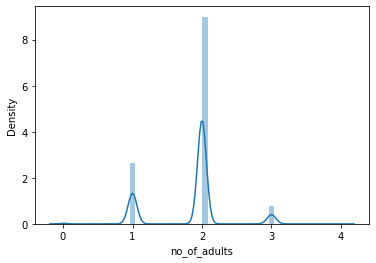

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


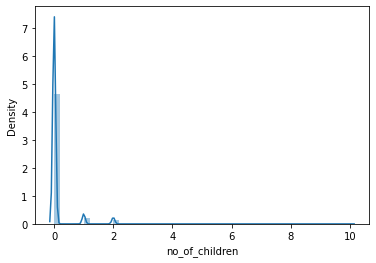

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


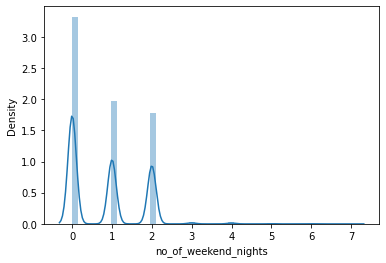

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


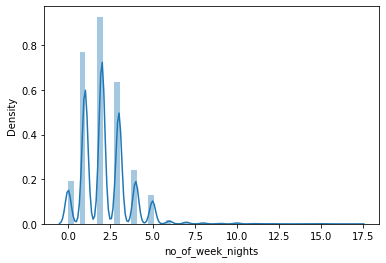

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


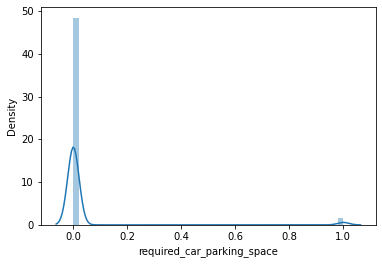

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


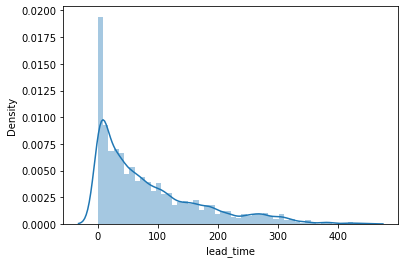

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


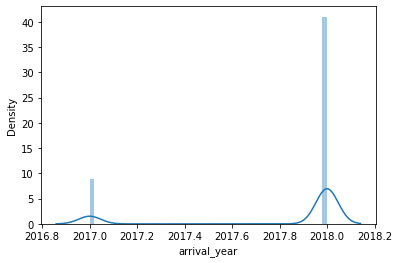

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


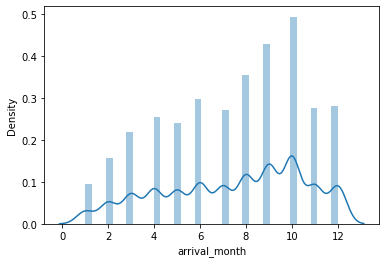

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


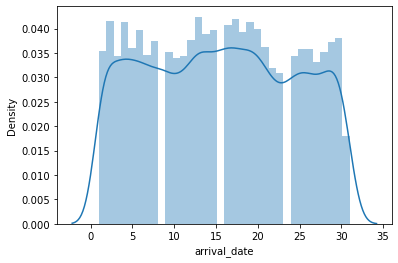

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


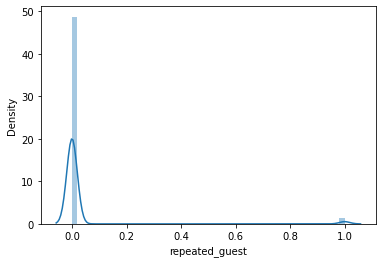

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


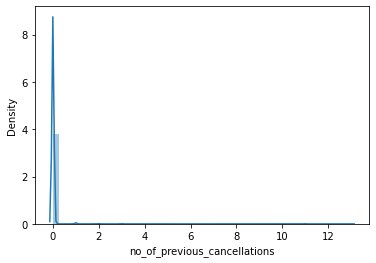

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


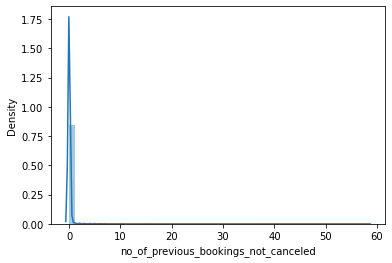

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


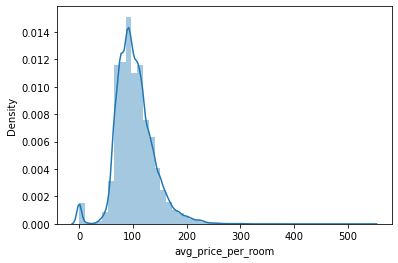

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


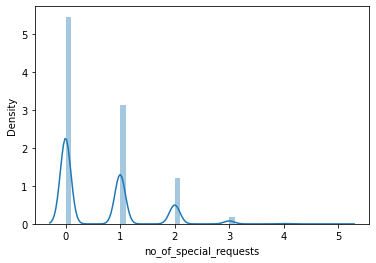

In [7]:
for i in num:
    sns.distplot(data[i])
    plt.show()

As we can see many of the columns are skewed towards the right, if we transform them a little bit, it may affect our accuracy, so lets give it a try. For right skwed data it is good to use `Log Transformer`. I used the major transformers in the backend, and found the best reuslts came out with `Log Transformer`. So we will be going with it 

In [8]:
trf = FunctionTransformer(func = np.log1p)
data_num = trf.fit_transform(data[num])

Function tranformer do not joins the data with the original dataset. So we need to do it manaually

In [9]:
data.drop(num , axis = 1 , inplace = True)

In [10]:
data_new = pd.concat([data , data_num] , axis = 1 , join = "inner")

Lets take a look at our dataset 

In [11]:
data_new

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled,1.098612,0.0,0.693147,1.098612,0.0,5.416100,7.609862,2.397895,1.098612,0.0,0.0,0.0,4.189655,0.000000
1,Not Selected,Room_Type 1,Online,Not_Canceled,1.098612,0.0,1.098612,1.386294,0.0,1.791759,7.610358,2.484907,1.945910,0.0,0.0,0.0,4.679164,0.693147
2,Meal Plan 1,Room_Type 1,Online,Canceled,0.693147,0.0,1.098612,0.693147,0.0,0.693147,7.610358,1.098612,3.367296,0.0,0.0,0.0,4.110874,0.000000
3,Meal Plan 1,Room_Type 1,Online,Canceled,1.098612,0.0,0.000000,1.098612,0.0,5.356586,7.610358,1.791759,3.044522,0.0,0.0,0.0,4.615121,0.000000
4,Not Selected,Room_Type 1,Online,Canceled,1.098612,0.0,0.693147,0.693147,0.0,3.891820,7.610358,1.609438,2.484907,0.0,0.0,0.0,4.559126,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled,1.386294,0.0,1.098612,1.945910,0.0,4.454347,7.610358,2.197225,1.386294,0.0,0.0,0.0,5.128715,0.693147
36271,Meal Plan 1,Room_Type 1,Online,Canceled,1.098612,0.0,0.693147,1.386294,0.0,5.433722,7.610358,2.397895,2.890372,0.0,0.0,0.0,4.521245,1.098612
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled,1.098612,0.0,1.098612,1.945910,0.0,5.003946,7.610358,2.079442,0.693147,0.0,0.0,0.0,4.599052,1.098612
36273,Not Selected,Room_Type 1,Online,Canceled,1.098612,0.0,0.000000,1.386294,0.0,4.158883,7.610358,1.609438,3.091042,0.0,0.0,0.0,4.559126,0.000000


Lets now work on categorical values for further procedure 

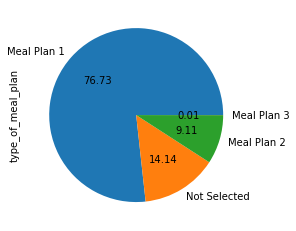

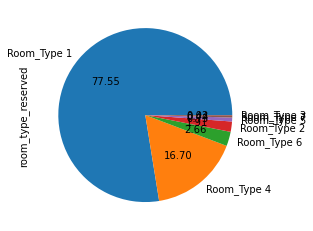

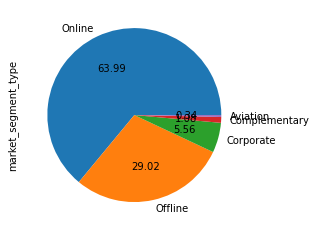

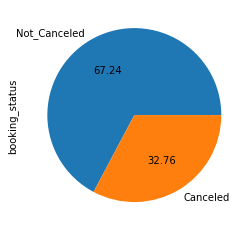

In [12]:
for i in cat:
    data_new[i].value_counts().plot(kind = "pie" , autopct = "%.2f")
    plt.show()

As we can see there are several values in the `market_segment_type` and `room_type_reserved` that have several values which comprises of only a small portion in the value, these may decrease the efficiency of the model, lets encode the major ones, and put the minor ones into another columns 

In [13]:
thr_rtr = 690
repl_rtr = data_new["room_type_reserved"].value_counts()[data_new["room_type_reserved"].value_counts() <= thr_rtr].index
rtr = pd.get_dummies(data_new["room_type_reserved"].replace(repl_rtr , "room_type_reserved_other"))

In [14]:
thr_mst = 2000
repl_mst = data_new["market_segment_type"].value_counts()[data_new["market_segment_type"].value_counts() <= thr_mst].index
mst = pd.get_dummies(data_new["market_segment_type"].replace(repl_mst , "market_segment_type_other"))

We do not now need these columns so lets remove the and add the new ones here  

In [15]:
data_new.drop(["room_type_reserved" , "market_segment_type"] , axis = 1 , inplace = True)

We need to join these to the original data as well

In [16]:
data_proc = pd.concat([rtr, mst , data_new], axis=1, join='inner')

In [17]:
data_proc

,Room_Type 1,Room_Type 2,Room_Type 4,Room_Type 6,room_type_reserved_other,Corporate,Offline,Online,market_segment_type_other,type_of_meal_plan,...,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1,0,0,0,0,0,1,0,0,Meal Plan 1,...,0.0,5.416100,7.609862,2.397895,1.098612,0.0,0.0,0.0,4.189655,0.000000
1,1,0,0,0,0,0,0,1,0,Not Selected,...,0.0,1.791759,7.610358,2.484907,1.945910,0.0,0.0,0.0,4.679164,0.693147
2,1,0,0,0,0,0,0,1,0,Meal Plan 1,...,0.0,0.693147,7.610358,1.098612,3.367296,0.0,0.0,0.0,4.110874,0.000000
3,1,0,0,0,0,0,0,1,0,Meal Plan 1,...,0.0,5.356586,7.610358,1.791759,3.044522,0.0,0.0,0.0,4.615121,0.000000
4,1,0,0,0,0,0,0,1,0,Not Selected,...,0.0,3.891820,7.610358,1.609438,2.484907,0.0,0.0,0.0,4.559126,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,0,1,0,0,0,0,1,0,Meal Plan 1,...,0.0,4.454347,7.610358,2.197225,1.386294,0.0,0.0,0.0,5.128715,0.693147
36271,1,0,0,0,0,0,0,1,0,Meal Plan 1,...,0.0,5.433722,7.610358,2.397895,2.890372,0.0,0.0,0.0,4.521245,1.098612
36272,1,0,0,0,0,0,0,1,0,Meal Plan 1,...,0.0,5.003946,7.610358,2.079442,0.693147,0.0,0.0,0.0,4.599052,1.098612
36273,1,0,0,0,0,0,0,1,0,Not Selected,...,0.0,4.158883,7.610358,1.609438,3.091042,0.0,0.0,0.0,4.559126,0.000000


Lets now see what are the columns left now for processig 

In [18]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Room_Type 1                           36275 non-null  uint8  
 1   Room_Type 2                           36275 non-null  uint8  
 2   Room_Type 4                           36275 non-null  uint8  
 3   Room_Type 6                           36275 non-null  uint8  
 4   room_type_reserved_other              36275 non-null  uint8  
 5   Corporate                             36275 non-null  uint8  
 6   Offline                               36275 non-null  uint8  
 7   Online                                36275 non-null  uint8  
 8   market_segment_type_other             36275 non-null  uint8  
 9   type_of_meal_plan                     36275 non-null  object 
 10  booking_status                        36275 non-null  object 
 11  no_of_adults   

As we can see there are still 2 columns with object datatype, which are categorical. We need to encode these values into numbers. For this we will use `one hot encoder` from `sklearn.metrics`. You can take a glance of `one hot encoder` [here in english](https://youtu.be/agvfUvUNI4A) and more information would be available [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) 
* `drop = "first"` is used to drop the first value or take only (n-1) values only 
* `sparse = "False"` to return a numpy array in the output  

In [19]:
ohe = OneHotEncoder(drop = "first" , sparse = False)

Now lets encode our data, and name it `new_data`

In [20]:
new_data = ohe.fit_transform(data_proc[["type_of_meal_plan" , "booking_status"]])

One hot encoder only encodes the data but do not combine the encodes data with the original dataset. We have to do it manually. So first lets drop the values that were encoded and store the values somewhere else. Just naming it, `half_data`

In [21]:
half_data = data_proc.drop(["type_of_meal_plan" , "booking_status"] , axis = 1)

Now lets combine these datasets into one

In [22]:
df = pd.concat([data_proc.select_dtypes(exclude='object'), 
               pd.DataFrame(new_data,columns=ohe.get_feature_names_out(["type_of_meal_plan" , "booking_status"])).astype(int)], axis=1)

The `df` here is not a dataframe, it is still a dictionary, we need to transform this into a dataframe 

In [23]:
df = pd.DataFrame(df)
df

,Room_Type 1,Room_Type 2,Room_Type 4,Room_Type 6,room_type_reserved_other,Corporate,Offline,Online,market_segment_type_other,no_of_adults,...,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,booking_status_Not_Canceled
0,1,0,0,0,0,0,1,0,0,1.098612,...,1.098612,0.0,0.0,0.0,4.189655,0.000000,0,0,0,1
1,1,0,0,0,0,0,0,1,0,1.098612,...,1.945910,0.0,0.0,0.0,4.679164,0.693147,0,0,1,1
2,1,0,0,0,0,0,0,1,0,0.693147,...,3.367296,0.0,0.0,0.0,4.110874,0.000000,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1.098612,...,3.044522,0.0,0.0,0.0,4.615121,0.000000,0,0,0,0
4,1,0,0,0,0,0,0,1,0,1.098612,...,2.484907,0.0,0.0,0.0,4.559126,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,0,0,1,0,0,0,0,1,0,1.386294,...,1.386294,0.0,0.0,0.0,5.128715,0.693147,0,0,0,1
36271,1,0,0,0,0,0,0,1,0,1.098612,...,2.890372,0.0,0.0,0.0,4.521245,1.098612,0,0,0,0
36272,1,0,0,0,0,0,0,1,0,1.098612,...,0.693147,0.0,0.0,0.0,4.599052,1.098612,0,0,0,1
36273,1,0,0,0,0,0,0,1,0,1.098612,...,3.091042,0.0,0.0,0.0,4.559126,0.000000,0,0,1,0


Now if we get the datatypes of the data, they will all be numerical 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Room_Type 1                           36275 non-null  uint8  
 1   Room_Type 2                           36275 non-null  uint8  
 2   Room_Type 4                           36275 non-null  uint8  
 3   Room_Type 6                           36275 non-null  uint8  
 4   room_type_reserved_other              36275 non-null  uint8  
 5   Corporate                             36275 non-null  uint8  
 6   Offline                               36275 non-null  uint8  
 7   Online                                36275 non-null  uint8  
 8   market_segment_type_other             36275 non-null  uint8  
 9   no_of_adults                          36275 non-null  float64
 10  no_of_children                        36275 non-null  float64
 11  no_of_weekend_n

There can still be null values here. Lets find if there are any

In [25]:
df.isnull().values.any()

False

As we can see there arent any null values. So we can get through this. Just in case if you find any null values at this step. You can use the code below to get rid of them. There are different approaches eliminating this problem and this is one of them that is commonly used 

```
for i in df.columns:
    if df[i].isnull().values.any():
        df[i].fillna(df[i].mean() , axis = 0 , inplace = True)
```


Lets see how many values of 1 and 0s are there in the value

In [26]:
df["booking_status_Not_Canceled"].value_counts()

1    24390
0    11885
Name: booking_status_Not_Canceled, dtype: int64

As we can see `1 are 24390` and `0 aare 11885` which are just half, this can lead to bad effieicncy of the model. We will use `RandomOverSmapling` from `imblearn.over_sampling`. You can get more info about it [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html). 

We can see that some data are in 100s and some are just 0/1. This can lead to baising in our model towards one feature. We need to scale the data accordingly 
We will be using `StandardScaler` from `sklearn.preprocessing `. You canm get more info about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

But lets first split our dataset into train and test now

We should check the correlation between the columns, this may increase out model efficiency

<AxesSubplot:>

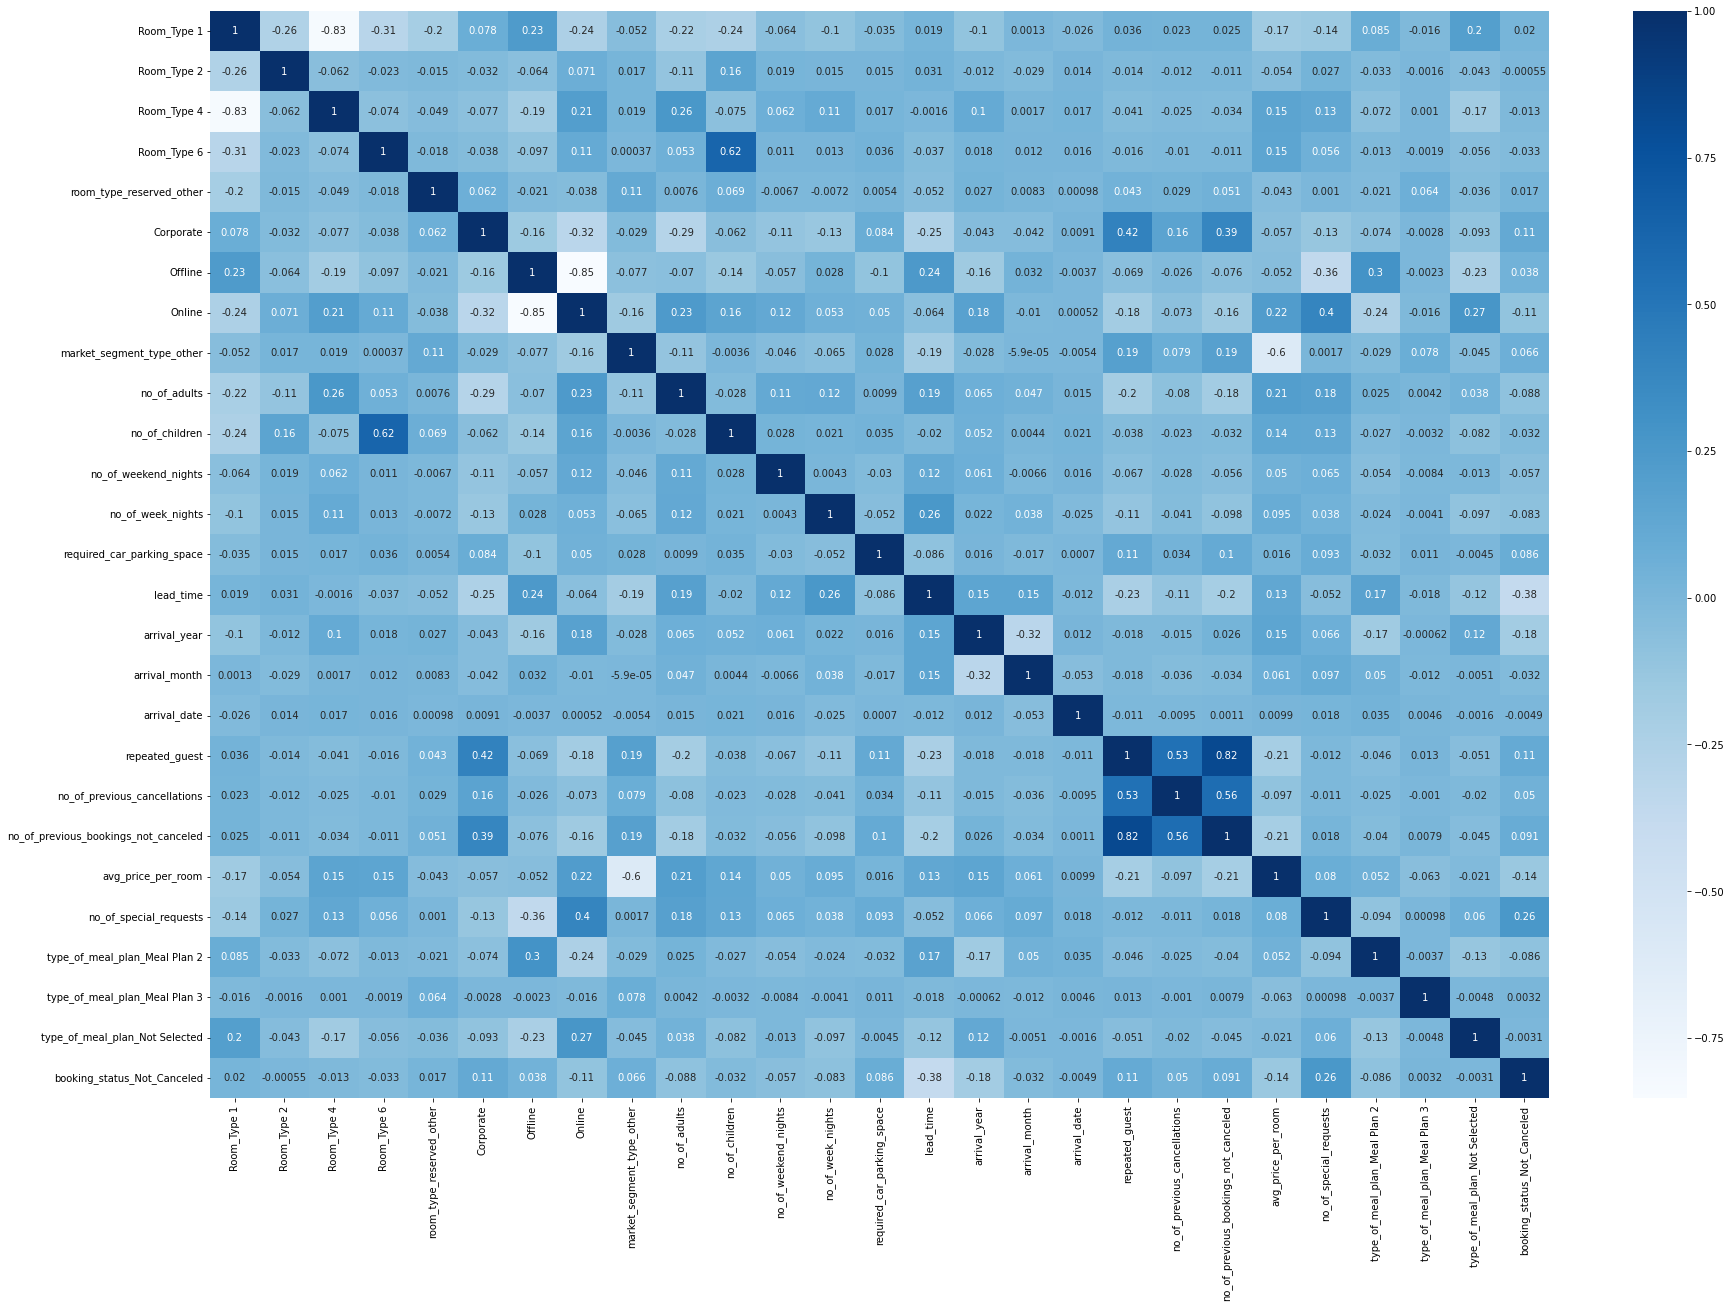

In [27]:
plt.figure(figsize = (30 , 20))
sns.heatmap(df.corr() , annot = True , cmap = "Blues")

As we can the correlation among the dtaset is really low at most of the points. we need to do somethign for this. but what is something ?...will update in the next version :)

In [28]:
train , test = np.split(df.sample(frac = 1) , [int(0.8 * len(df))])

In [29]:
def scaler(dataframe , oversampling = False):
    X = dataframe.drop("booking_status_Not_Canceled" , axis = 1)
    Y = dataframe["booking_status_Not_Canceled"]

    sc = StandardScaler()
    sc.fit_transform(X)

    ros = RandomOverSampler()
    if oversampling:
        ros.fit_resample(X , Y)

    return X , Y

In [30]:
X_train , Y_train = scaler(train , oversampling = True)

RandomOverSampler is not required in test dataset, as it has predictions to be made

In [31]:
X_test , Y_test = scaler(test)

Our data is good to go for modeling

We will first use the `KNeighbors CLasifier`. You can understand it [here in english](https://youtu.be/wKmEULDRszo) and more infomration will be available [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [32]:
model = KNeighborsClassifier()
model.fit(X_train , Y_train)
model.predict(X_test)
print((classification_report(Y_test , model.predict(X_test))))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2407
           1       0.88      0.90      0.89      4848

    accuracy                           0.85      7255
   macro avg       0.84      0.83      0.83      7255
weighted avg       0.85      0.85      0.85      7255



The second will be `Logistic Regression`. You can understand it [here in english](https://youtu.be/yIYKR4sgzI8) and more infomration will be available [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [33]:
model_1 = LogisticRegression()
model_1.fit(X_train , Y_train)
model_1.predict(X_test)
print((classification_report(Y_test , model_1.predict(X_test))))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67      2407
           1       0.82      0.89      0.86      4848

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The third and last would be `Gaussian Naive Bayes`. You can understand it [here in english](https://youtu.be/H3EjCKtlVog) and more infomration will be available [here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [34]:
model_2 = GaussianNB()
model_2.fit(X_train , Y_train)
model_2.predict(X_test)
print((classification_report(Y_test , model_2.predict(X_test))))

              precision    recall  f1-score   support

           0       0.36      0.96      0.52      2407
           1       0.89      0.15      0.25      4848

    accuracy                           0.42      7255
   macro avg       0.62      0.55      0.39      7255
weighted avg       0.71      0.42      0.34      7255



We have significantlly improved one of our modes that is `KNeighborsClassifier` from $80 % $ to $85%$, whereas, other two models saw a decrease in the accuracy. For `LogisticRegression` it came from $81%$ to $80%$ and for `GaussianNB` the change was of $1%$ in negative

**IF YOU LIKED MY WORK, PLEASE MAKE AN UPVOTE :)**
**WORKING MORE ON IMPROVING IT**